In [1]:
from selenium import webdriver
import pandas as pd
import numpy as np

In [2]:
chrome_options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=chrome_options, executable_path="C:\chromedriver.exe")

html_list = []

for page in range(1, 101):
    driver.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p' + str(page))
    page_html = driver.page_source
    html_list.append(page_html)

In [449]:
from bs4 import BeautifulSoup

comment_list = []

for page_html in html_list:
    soup = BeautifulSoup(page_html, 'html.parser')
    comments = soup.find_all('div', class_='Message userContent')
    comments = [comment.text.lstrip('\n') for comment in comments]
    comment_list.append(comments)
    
flat_list = [item.lower() for sublist in comment_list for item in sublist]

In [450]:
flat_list[500]

'i\'m hoping to be old, rich, healthy, driving an m6 and ummm, errr, how can i say this, ummm, "in the mood". ;-)best regards,shipo '

In [451]:
models = pd.read_csv('models (5).csv', header = None)
models_dict = dict(zip(models[1], models[0]))

In [452]:
brand_replace = []

for comment in flat_list:
    for model, brand in models_dict.items():
        comment = comment.replace(' ' + model + ' ', ' ' + brand + ' ')
    brand_replace.append(comment)

In [453]:
brand_replace

['entry level performance luxury sedan are a hot area for car manufacturers and enthusiasts alike. these sedan show their performance by being fun to drive and handling well. they show luxury by offering leather and some of the important creatures comforts found in the most luxurious upscale sedans. the selection of vehicles that compete in the space is vast and varied.the benchmarks which define this are the bmw 330 and the audi audi 3.0. but there are many contenders, such as acura tl-s, chrysler 300m, jaguar x-type, infiniti i35, mercedes-benz c-class, volvo volvo t5. some companies have contenders that emphasize performance lexus is300 or luxury lexus es300. and the field is continously growing, with the recent additions being the cadillac cts and infiniti g35.the common charateristics of this entry level perfomance luxury group seem to a price around 30 to 40k (us dollars) and 0-60 times between six and eight seconds.with this wide variety of car targeted at a similar market segme

In [454]:
models_list = models[0].drop_duplicates().values

In [455]:
df = pd.DataFrame(brand_replace, columns = ['text'])

In [456]:
for model in models_list:
    df[model] = df['text'].str.contains(model).astype(int)

In [457]:
freq = df.iloc[:,1:]

In [458]:
#probability a brand appears
probability = freq.sum()/len(freq)
probability.sort_values(ascending=False)

car              0.539292
bmw              0.278144
sedan            0.138572
acura            0.112178
audi             0.087383
infiniti         0.081184
honda            0.075585
seat             0.057788
problem          0.055589
nissan.          0.054589
nissan           0.054589
toyota           0.048790
ford             0.043991
mercedes         0.040992
subaru           0.040392
mercedes-benz    0.035193
volkswagen       0.029394
volvo            0.027794
cadillac         0.022795
hyundai.         0.021596
hyundai          0.021596
mazda            0.017397
chevrolet        0.014597
lincoln          0.012398
chrysler         0.011398
pontiac          0.009598
dodge            0.009198
buick            0.006199
kia.             0.004999
kia              0.004999
mitsubishi       0.004199
suzuki           0.003199
saturn           0.002599
hyundai,         0.001800
mercury          0.001600
kia,             0.000800
volkwagen        0.000200
mercedes benz    0.000200
hyndai kia  

In [459]:
probability.sort_values(ascending=False).index

Index(['car', 'bmw', 'sedan', 'acura', 'audi', 'infiniti', 'honda', 'seat',
       'problem', 'nissan.', 'nissan', 'toyota', 'ford', 'mercedes', 'subaru',
       'mercedes-benz', 'volkswagen', 'volvo', 'cadillac', 'hyundai.',
       'hyundai', 'mazda', 'chevrolet', 'lincoln', 'chrysler', 'pontiac',
       'dodge', 'buick', 'kia.', 'kia', 'mitsubishi', 'suzuki', 'saturn',
       'hyundai,', 'mercury', 'kia,', 'volkwagen', 'mercedes benz',
       'hyndai kia', 'toyata'],
      dtype='object')

In [460]:
# top_ten = list(probability.sort_values(ascending=False).index[:10])

#there are non brand values in the csv so I'm doing this manually:

top_ten = ['bmw', 'acura', 'audi', 'infiniti', 'honda',
           'nissan', 'toyota', 'ford', 'mercedes', 'subaru']

In [461]:
len(top_ten)

10

In [462]:
top_ten

['bmw',
 'acura',
 'audi',
 'infiniti',
 'honda',
 'nissan',
 'toyota',
 'ford',
 'mercedes',
 'subaru']

In [463]:
from itertools import combinations
cc = list(combinations(top_ten,2))

In [464]:
#join probability
lift_dict = dict()


for combination in cc:
    mask = freq[(freq[combination[0]]==1) & (freq[combination[1]]==1)]
    join_prob = len(mask)/len(freq)
    
    denominator = probability[combination[0]]*probability[combination[1]]
    lift = join_prob/denominator
    lift_dict[(combination[0], combination[1])] = lift

In [465]:
from operator import itemgetter

lift_sort = list(lift_dict.items())
lift_sort.sort(key=itemgetter(1), reverse=True)
lift_sort

[(('nissan', 'toyota'), 4.57967032967033),
 (('honda', 'toyota'), 4.500422846734322),
 (('honda', 'nissan'), 4.361590790162219),
 (('audi', 'mercedes'), 3.461092816877825),
 (('infiniti', 'nissan'), 3.248633140258756),
 (('acura', 'infiniti'), 3.2056847817496905),
 (('acura', 'honda'), 2.829980477039301),
 (('audi', 'infiniti'), 2.6213941901229836),
 (('infiniti', 'mercedes'), 2.5837198125675833),
 (('toyota', 'ford'), 2.3290797317436662),
 (('ford', 'mercedes'), 2.3286252771618625),
 (('acura', 'mercedes'), 2.304708490935177),
 (('acura', 'audi'), 2.284707350799692),
 (('honda', 'ford'), 2.2250721500721506),
 (('acura', 'nissan'), 2.1551389786683908),
 (('bmw', 'infiniti'), 2.0455762413545204),
 (('acura', 'subaru'), 1.985889765447133),
 (('audi', 'ford'), 1.9246619513209904),
 (('bmw', 'mercedes'), 1.8590100120986832),
 (('bmw', 'audi'), 1.8428768135134825),
 (('infiniti', 'subaru'), 1.8293664341803637),
 (('nissan', 'subaru'), 1.8137308236318137),
 (('audi', 'subaru'), 1.81290074087

In [466]:
lift_df = pd.DataFrame(0, index=top_ten, columns=top_ten)

for lift in lift_sort:
    lift_df.loc[lift[0][0], lift[0][1]] = lift[1]
    
for lift in lift_sort:
    lift_df.loc[lift[0][1], lift[0][0]] = lift[1]
    
lift_df

,bmw,acura,audi,infiniti,honda,nissan,toyota,ford,mercedes,subaru
bmw,0.000000,1.621390,1.842877,2.045576,1.188907,1.264266,1.340853,1.405418,1.859010,1.156889
acura,1.621390,0.000000,2.284707,3.205685,2.829980,2.155139,1.607522,1.742368,2.304708,1.985890
audi,1.842877,2.284707,0.000000,2.621394,1.271548,1.299495,1.219436,1.924662,3.461093,1.812901
infiniti,2.045576,3.205685,2.621394,0.000000,1.661916,3.248633,1.312545,1.735681,2.583720,1.829366
honda,1.188907,2.829980,1.271548,1.661916,0.000000,4.361591,4.500423,2.225072,1.807046,1.375413
nissan,1.264266,2.155139,1.299495,3.248633,4.361591,0.000000,4.579670,1.748601,1.697829,1.813731
toyota,1.340853,1.607522,1.219436,1.312545,4.500423,4.579670,0.000000,2.329080,1.799640,1.420508
ford,1.405418,1.742368,1.924662,1.735681,2.225072,1.748601,2.329080,0.000000,2.328625,1.575473
mercedes,1.859010,2.304708,3.461093,2.583720,1.807046,1.697829,1.799640,2.328625,0.000000,1.449215
subaru,1.156889,1.985890,1.812901,1.829366,1.375413,1.813731,1.420508,1.575473,1.449215,0.000000


In [467]:
lift_df = lift_df.replace(0, .01)
lift_df = 1/lift_df
lift_df = lift_df.replace(np.inf, 0)
np.fill_diagonal(lift_df.values, 0)
lift_df

,bmw,acura,audi,infiniti,honda,nissan,toyota,ford,mercedes,subaru
bmw,0.000000,0.616755,0.542630,0.488860,0.841109,0.790973,0.745794,0.711532,0.537921,0.864387
acura,0.616755,0.000000,0.437693,0.311946,0.353359,0.464007,0.622076,0.573932,0.433894,0.503553
audi,0.542630,0.437693,0.000000,0.381476,0.786443,0.769530,0.820051,0.519572,0.288926,0.551602
infiniti,0.488860,0.311946,0.381476,0.000000,0.601715,0.307822,0.761878,0.576143,0.387039,0.546637
honda,0.841109,0.353359,0.786443,0.601715,0.000000,0.229274,0.222201,0.449424,0.553389,0.727055
nissan,0.790973,0.464007,0.769530,0.307822,0.229274,0.000000,0.218356,0.571886,0.588987,0.551350
toyota,0.745794,0.622076,0.820051,0.761878,0.222201,0.218356,0.000000,0.429354,0.555667,0.703973
ford,0.711532,0.573932,0.519572,0.576143,0.449424,0.571886,0.429354,0.000000,0.429438,0.634730
mercedes,0.537921,0.433894,0.288926,0.387039,0.553389,0.588987,0.555667,0.429438,0.000000,0.690029
subaru,0.864387,0.503553,0.551602,0.546637,0.727055,0.551350,0.703973,0.634730,0.690029,0.000000


# MDS Example

Implementing example from here:

http://www.mathpsy.uni-tuebingen.de/wickelmaier/pubs/Wickelmaier2003SQRU.pdf

In [468]:
P = np.array([[0, 93, 82, 133],
              [93, 0, 52, 60],
              [82, 52, 0, 111],
              [133, 60, 111, 0]])

n = len(P)

In [469]:
P**2

array([[    0,  8649,  6724, 17689],
       [ 8649,     0,  2704,  3600],
       [ 6724,  2704,     0, 12321],
       [17689,  3600, 12321,     0]], dtype=int32)

In [470]:
J = np.identity(n) - (1/n)*np.ones((n,n))
J

array([[ 0.75, -0.25, -0.25, -0.25],
       [-0.25,  0.75, -0.25, -0.25],
       [-0.25, -0.25,  0.75, -0.25],
       [-0.25, -0.25, -0.25,  0.75]])

In [471]:
B = -.5*np.matmul(J, np.matmul(P**2, J))
B

array([[ 5035.0625, -1553.0625,   258.9375, -3740.9375],
       [-1553.0625,   507.8125,     5.3125,  1039.9375],
       [  258.9375,     5.3125,  2206.8125, -2471.0625],
       [-3740.9375,  1039.9375, -2471.0625,  5172.0625]])

In [472]:
eigenvalues, eigenvectors = np.linalg.eig(B)

In [473]:
eigenvectors

array([[-0.63715969,  0.58649822, -0.5       ,  0.00688237],
       [ 0.18662069, -0.21391682, -0.5       , -0.81817621],
       [-0.25311714, -0.70631521, -0.5       ,  0.43249339],
       [ 0.70365614,  0.33373381, -0.5       ,  0.37880045]])

In [474]:
eigenvalues

array([9.72416760e+03, 3.16098584e+03, 4.75051094e-13, 3.65965590e+01])

In [475]:
eigenvalues = eigenvalues[:2]
eigenvalues

array([9724.16760032, 3160.98584073])

In [476]:
eigenvectors = eigenvectors[:,:2]
eigenvectors

array([[-0.63715969,  0.58649822],
       [ 0.18662069, -0.21391682],
       [-0.25311714, -0.70631521],
       [ 0.70365614,  0.33373381]])

In [477]:
X = np.matmul(eigenvectors, np.identity(len(eigenvalues))*np.sqrt(eigenvalues))
X

array([[-62.83107784,  32.9744814 ],
       [ 18.40288902, -12.02696922],
       [-24.96018328, -39.71090964],
       [ 69.38837211,  18.76339745]])

In [478]:
%matplotlib inline
import matplotlib.pyplot as plt

def MDS(P, labels = None, n_dim = 2, plot = False):
        n = len(P)
        J = np.identity(n) - (1/n)*np.ones((n,n))
        B = -.5*np.matmul(J, np.matmul(P**2, J))
        
        eigenvalues, eigenvectors = np.linalg.eig(B)
        
        eigenvalues = eigenvalues[:n_dim]
        eigenvectors = eigenvectors[:,:n_dim]
        
        X = np.matmul(eigenvectors, np.identity(len(eigenvalues))*np.sqrt(eigenvalues))
        
        if plot:
            plt.scatter(*zip(*X))
            
            if labels is not None:
                for pair in list(zip(labels, X)):
                    plt.annotate(pair[0], pair[1])
        
        return X

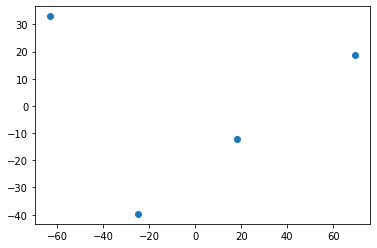

In [479]:
#note that it is rotated MDS produces a result that is unique only up to rotation/reflection
#in this case it's because numpy returned the negative of the second eigenvector compared to the example
#doesn't matter for brands, but would be an annoyance if this were physical data

ret = MDS(np.array([[0, 93, 82, 133],
              [93, 0, 52, 60],
              [82, 52, 0, 111],
              [133, 60, 111, 0]]), n_dim = 2, plot = True)

# Use it on the brands

In [480]:
lift_df

,bmw,acura,audi,infiniti,honda,nissan,toyota,ford,mercedes,subaru
bmw,0.000000,0.616755,0.542630,0.488860,0.841109,0.790973,0.745794,0.711532,0.537921,0.864387
acura,0.616755,0.000000,0.437693,0.311946,0.353359,0.464007,0.622076,0.573932,0.433894,0.503553
audi,0.542630,0.437693,0.000000,0.381476,0.786443,0.769530,0.820051,0.519572,0.288926,0.551602
infiniti,0.488860,0.311946,0.381476,0.000000,0.601715,0.307822,0.761878,0.576143,0.387039,0.546637
honda,0.841109,0.353359,0.786443,0.601715,0.000000,0.229274,0.222201,0.449424,0.553389,0.727055
nissan,0.790973,0.464007,0.769530,0.307822,0.229274,0.000000,0.218356,0.571886,0.588987,0.551350
toyota,0.745794,0.622076,0.820051,0.761878,0.222201,0.218356,0.000000,0.429354,0.555667,0.703973
ford,0.711532,0.573932,0.519572,0.576143,0.449424,0.571886,0.429354,0.000000,0.429438,0.634730
mercedes,0.537921,0.433894,0.288926,0.387039,0.553389,0.588987,0.555667,0.429438,0.000000,0.690029
subaru,0.864387,0.503553,0.551602,0.546637,0.727055,0.551350,0.703973,0.634730,0.690029,0.000000


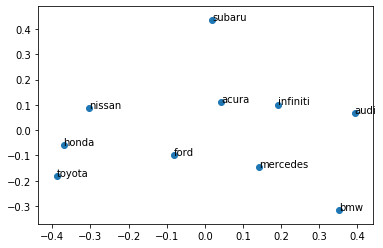

In [481]:
mds_coordinates = MDS(lift_df.values, labels = lift_df.index, n_dim = 2, plot = True)

In [482]:
mds_coordinates

array([[ 0.35184332, -0.31773516],
       [ 0.04327625,  0.11140927],
       [ 0.39258065,  0.06606985],
       [ 0.1909614 ,  0.10126844],
       [-0.37026783, -0.06020271],
       [-0.3025737 ,  0.08787747],
       [-0.38722523, -0.18136887],
       [-0.08076291, -0.09943357],
       [ 0.14290218, -0.14474078],
       [ 0.01926588,  0.43685607]])

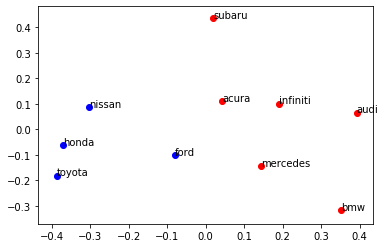

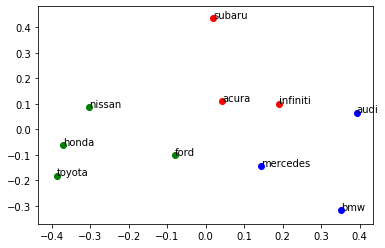

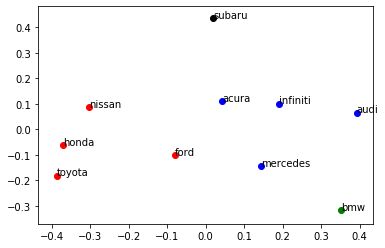

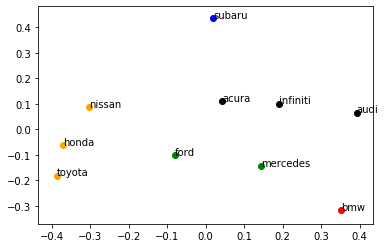

In [483]:
from sklearn.cluster import KMeans

key = {0:'blue', 1:'red', 2:'green', 3:'black', 4:'orange', 5:'yellow'}

for k in range(2,6):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(mds_coordinates)
    cluster = list(zip(lift_df.index, kmeans.predict(mds_coordinates), mds_coordinates))

    for brand in cluster:
        plt.scatter(*brand[2], color = key[brand[1]])

    for brand in cluster:
        plt.annotate(brand[0], brand[2])
        
    plt.show()

# Attributes:

In [484]:
import nltk
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.corpus import stopwords 
import re

stop_words = set(stopwords.words('english'))

full_text = ' '.join(brand_replace)
pattern = re.compile('([^\s\w]|_)+')
full_text = pattern.sub('', full_text)

tokens = nltk.word_tokenize(full_text)

filtered_sentence = [w for w in tokens if not w in stop_words] 

word_fd = nltk.FreqDist(filtered_sentence)
bigram_fd = nltk.FreqDist(nltk.bigrams(filtered_sentence))

bigram_fd.most_common()

[(('3', 'series'), 357),
 (('dont', 'think'), 156),
 (('dont', 'know'), 130),
 (('torque', 'steer'), 127),
 (('im', 'sure'), 118),
 (('entry', 'level'), 109),
 (('g35', 'coupe'), 108),
 (('gas', 'mileage'), 104),
 (('acura', 'tl'), 99),
 (('sport', 'sedan'), 98),
 (('rwd', 'car'), 97),
 (('test', 'drive'), 96),
 (('fwd', 'car'), 95),
 (('luxury', 'performance'), 92),
 (('car', 'like'), 89),
 (('sports', 'sedan'), 87),
 (('much', 'better'), 84),
 (('manual', 'transmission'), 83),
 (('performance', 'sedan'), 80),
 (('bmw', '3'), 79),
 (('g35', 'sedan'), 75),
 (('audi', 'audi'), 74),
 (('near', 'luxury'), 74),
 (('bmw', 'bmw'), 73),
 (('dont', 'want'), 72),
 (('winter', 'tires'), 72),
 (('5', 'series'), 71),
 (('luxury', 'car'), 70),
 (('looks', 'like'), 68),
 (('buy', 'car'), 66),
 (('dont', 'like'), 63),
 (('car', 'would'), 63),
 (('test', 'drove'), 63),
 (('sport', 'package'), 62),
 (('dont', 'care'), 62),
 (('sports', 'car'), 62),
 (('many', 'people'), 62),
 (('even', 'though'), 60),


I will guess at the following attributes and associations from the above distribution of bigrams:

In [534]:
attribute_dict = dict()

power = ['power', 'powerful', 'performance']
comfort = ['luxury', 'comfort']
maintenance = ['reliable', 'break down', 'maintenance']
customer_service = ['customer service']
price = ['expensive', 'price']

In [535]:
for association in power:
    attribute_dict[association] = 'power'
    
for association in comfort:
    attribute_dict[association] = 'comfort'
    
for association in maintenance:
    attribute_dict[association] = 'maintenance'
    
for association in customer_service:
    attribute_dict[association] = 'customer_service'
    
for association in price:
    attribute_dict[association] = 'price'

In [536]:
attribute_dict

{'power': 'power',
 'powerful': 'power',
 'performance': 'power',
 'luxury': 'comfort',
 'comfort': 'comfort',
 'reliable': 'maintenance',
 'break down': 'maintenance',
 'maintenance': 'maintenance',
 'customer service': 'customer_service',
 'expensive': 'price',
 'price': 'price'}

In [537]:
attribute_list = ['power', 'comfort', 'maintenance', 'customer_service', 'price']

In [538]:
attr_replace = []

for comment in brand_replace:
    for proxy, attr in attribute_dict.items():
        comment = comment.replace(' ' + proxy + ' ', ' ' + attr + ' ')
    attr_replace.append(comment)

In [539]:
attr_df = pd.DataFrame(attr_replace, columns = ['text'])
attr_df

,text
0,entry level power comfort sedan are a hot area...
1,i personally think that with a few tweaks the ...
2,i am debating a new purchase and these two are...
3,"great handling, rwd, excellent engine and the ..."
4,and no manual tranny. that may not matter to y...
...,...
4996,i agree with blueguydotcom. the is350 is one f...
4997,don't have any interest in aftermarket tuners....
4998,>don't have any interest in aftermarket tuners...
4999,amg i have no use for...it's mb afterall. as f...


In [540]:
for attr in attribute_list:
    attr_df[attr] = attr_df['text'].str.contains(attr).astype(int)

In [541]:
attr_df

,text,power,comfort,maintenance,customer_service,price
0,entry level power comfort sedan are a hot area...,1,1,0,0,1
1,i personally think that with a few tweaks the ...,1,1,0,0,1
2,i am debating a new purchase and these two are...,0,0,0,0,1
3,"great handling, rwd, excellent engine and the ...",0,0,0,0,0
4,and no manual tranny. that may not matter to y...,0,0,0,0,0
...,...,...,...,...,...,...
4996,i agree with blueguydotcom. the is350 is one f...,1,0,0,0,0
4997,don't have any interest in aftermarket tuners....,0,0,0,0,0
4998,>don't have any interest in aftermarket tuners...,0,0,0,0,0
4999,amg i have no use for...it's mb afterall. as f...,0,0,0,0,0


In [542]:
top_five_brands = df[top_ten[:5]]
top_five_brands

,bmw,acura,audi,infiniti,honda
0,1,1,1,1,0
1,1,1,1,0,0
2,0,1,0,0,1
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
4996,0,0,0,0,1
4997,1,0,0,0,0
4998,1,0,0,0,0
4999,1,0,0,0,0


In [543]:
brand_attr = pd.concat([top_five_brands,
                        attr_df.drop(['text'], axis = 1)], axis = 1)
brand_attr

,bmw,acura,audi,infiniti,honda,power,comfort,maintenance,customer_service,price
0,1,1,1,1,0,1,1,0,0,1
1,1,1,1,0,0,1,1,0,0,1
2,0,1,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,1,1,0,0,0,0
4997,1,0,0,0,0,0,0,0,0,0
4998,1,0,0,0,0,0,0,0,0,0
4999,1,0,0,0,0,0,0,0,0,0


In [544]:
cc_attr = list(combinations(brand_attr.T.index,2))

In [545]:
#attribute/band probability

prob_attr = brand_attr.sum()/len(brand_attr)
prob_attr

bmw                 0.278144
acura               0.112178
audi                0.087383
infiniti            0.081184
honda               0.075585
power               0.195561
comfort             0.095781
maintenance         0.026995
customer_service    0.001000
price               0.128774
dtype: float64

In [546]:
#join probability
attr_lift_dict = dict()


for combination in cc_attr:
    mask = brand_attr[(brand_attr[combination[0]]==1) & (brand_attr[combination[1]]==1)]
    join_prob = len(mask)/len(freq)
    
    denominator = prob_attr[combination[0]]*prob_attr[combination[1]]
    lift = join_prob/denominator
    attr_lift_dict[(combination[0], combination[1])] = lift

In [547]:
attr_lift_sort = list(attr_lift_dict.items())
attr_lift_sort.sort(key=itemgetter(1), reverse=True)
attr_lift_sort

[(('infiniti', 'customer_service'), 7.39064039408867),
 (('acura', 'infiniti'), 3.2056847817496905),
 (('bmw', 'customer_service'), 2.8762041696621132),
 (('acura', 'honda'), 2.829980477039301),
 (('honda', 'customer_service'), 2.6460317460317464),
 (('audi', 'infiniti'), 2.6213941901229836),
 (('audi', 'customer_service'), 2.2887871853546913),
 (('acura', 'audi'), 2.284707350799692),
 (('maintenance', 'price'), 2.243374741200828),
 (('power', 'comfort'), 2.0923703523444805),
 (('comfort', 'customer_service'), 2.088100208768267),
 (('bmw', 'maintenance'), 2.0506270468887293),
 (('bmw', 'infiniti'), 2.0455762413545204),
 (('comfort', 'price'), 1.9454349771132926),
 (('infiniti', 'maintenance'), 1.9160919540229882),
 (('audi', 'price'), 1.8480890316528562),
 (('bmw', 'audi'), 1.8428768135134825),
 (('acura', 'comfort'), 1.842441360677883),
 (('acura', 'customer_service'), 1.7828877005347594),
 (('power', 'maintenance'), 1.7044989775051123),
 (('honda', 'comfort'), 1.6848427610431786),
 (

In [553]:
attr_lift_df = pd.DataFrame(0, index=brand_attr.T.index, columns=brand_attr.T.index)

for lift in attr_lift_sort:
    attr_lift_df.loc[lift[0][0], lift[0][1]] = lift[1]
    
for lift in attr_lift_sort:
    attr_lift_df.loc[lift[0][1], lift[0][0]] = lift[1]
    
attr_lift_df

,bmw,acura,audi,infiniti,honda,power,comfort,maintenance,customer_service,price
bmw,0.000000,1.621390,1.842877,2.045576,1.188907,1.521918,1.411081,2.050627,2.876204,1.585485
acura,1.621390,0.000000,2.284707,3.205685,2.829980,1.631579,1.842441,1.254625,1.782888,1.425756
audi,1.842877,2.284707,0.000000,2.621394,1.271548,1.544580,1.624609,1.610628,2.288787,1.848089
infiniti,2.045576,3.205685,2.621394,0.000000,1.661916,1.511378,1.568647,1.916092,7.390640,1.549280
honda,1.188907,2.829980,1.271548,1.661916,0.000000,1.582749,1.684843,1.666020,2.646032,1.684585
power,1.521918,1.631579,1.544580,1.511378,1.582749,0.000000,2.092370,1.704499,0.000000,1.635684
comfort,1.411081,1.842441,1.624609,1.568647,1.684843,2.092370,0.000000,1.469404,2.088100,1.945435
maintenance,2.050627,1.254625,1.610628,1.916092,1.666020,1.704499,1.469404,0.000000,0.000000,2.243375
customer_service,2.876204,1.782888,2.288787,7.390640,2.646032,0.000000,2.088100,0.000000,0.000000,1.553106
price,1.585485,1.425756,1.848089,1.549280,1.684585,1.635684,1.945435,2.243375,1.553106,0.000000


In [554]:
attr_lift_df = attr_lift_df.replace(0, .01)
attr_lift_df = 1/attr_lift_df
attr_lift_df = attr_lift_df.replace(np.inf, 0)
np.fill_diagonal(attr_lift_df.values, 0)
attr_lift_df = attr_lift_df.replace(100, .01)
attr_lift_df

,bmw,acura,audi,infiniti,honda,power,comfort,maintenance,customer_service,price
bmw,0.000000,0.616755,0.542630,0.488860,0.841109,0.657066,0.708676,0.487656,0.347680,0.630722
acura,0.616755,0.000000,0.437693,0.311946,0.353359,0.612903,0.542758,0.797051,0.560888,0.701382
audi,0.542630,0.437693,0.000000,0.381476,0.786443,0.647425,0.615533,0.620876,0.436913,0.541099
infiniti,0.488860,0.311946,0.381476,0.000000,0.601715,0.661648,0.637492,0.521896,0.135306,0.645461
honda,0.841109,0.353359,0.786443,0.601715,0.000000,0.631812,0.593527,0.600233,0.377924,0.593618
power,0.657066,0.612903,0.647425,0.661648,0.631812,0.000000,0.477927,0.586683,0.010000,0.611365
comfort,0.708676,0.542758,0.615533,0.637492,0.593527,0.477927,0.000000,0.680548,0.478904,0.514024
maintenance,0.487656,0.797051,0.620876,0.521896,0.600233,0.586683,0.680548,0.000000,0.010000,0.445757
customer_service,0.347680,0.560888,0.436913,0.135306,0.377924,0.010000,0.478904,0.010000,0.000000,0.643871
price,0.630722,0.701382,0.541099,0.645461,0.593618,0.611365,0.514024,0.445757,0.643871,0.000000


In [555]:
attr_lift_df

,bmw,acura,audi,infiniti,honda,power,comfort,maintenance,customer_service,price
bmw,0.000000,0.616755,0.542630,0.488860,0.841109,0.657066,0.708676,0.487656,0.347680,0.630722
acura,0.616755,0.000000,0.437693,0.311946,0.353359,0.612903,0.542758,0.797051,0.560888,0.701382
audi,0.542630,0.437693,0.000000,0.381476,0.786443,0.647425,0.615533,0.620876,0.436913,0.541099
infiniti,0.488860,0.311946,0.381476,0.000000,0.601715,0.661648,0.637492,0.521896,0.135306,0.645461
honda,0.841109,0.353359,0.786443,0.601715,0.000000,0.631812,0.593527,0.600233,0.377924,0.593618
power,0.657066,0.612903,0.647425,0.661648,0.631812,0.000000,0.477927,0.586683,0.010000,0.611365
comfort,0.708676,0.542758,0.615533,0.637492,0.593527,0.477927,0.000000,0.680548,0.478904,0.514024
maintenance,0.487656,0.797051,0.620876,0.521896,0.600233,0.586683,0.680548,0.000000,0.010000,0.445757
customer_service,0.347680,0.560888,0.436913,0.135306,0.377924,0.010000,0.478904,0.010000,0.000000,0.643871
price,0.630722,0.701382,0.541099,0.645461,0.593618,0.611365,0.514024,0.445757,0.643871,0.000000


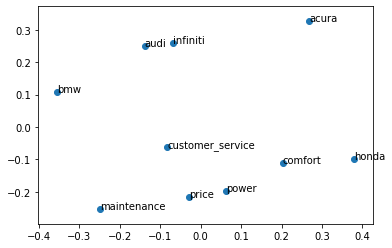

In [556]:
mds_coordinates = MDS(attr_lift_df.values, labels = attr_lift_df.T.index, n_dim = 2, plot = True)

In [557]:
mds_coordinates

array([[-0.35371617,  0.10669126],
       [ 0.26891509,  0.32795678],
       [-0.13770349,  0.25082945],
       [-0.06697302,  0.25816237],
       [ 0.38002493, -0.09913571],
       [ 0.06381743, -0.19804893],
       [ 0.20357795, -0.11174091],
       [-0.24807821, -0.25484036],
       [-0.08213297, -0.06351348],
       [-0.02773154, -0.21636048]])